In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

!mkdir "/kaggle/working/labels"
!cp -r "/kaggle/input/atc-data/imgs" "/kaggle/working/images"

# Dataset

In [2]:
imgs = os.listdir('/kaggle/working/images')
imgs_train, imgs_val = train_test_split(imgs, test_size=0.1)

df = pd.read_csv('/kaggle/input/atc-data/atc_annotation.csv')
df

,xmin,ymin,xmax,ymax,name,file,width,height,class,Xcent,Ycent,boxW,boxH
0,192,198,291,283,invalid,try7_img-upper-3-0,640,480,NaN,0.377344,0.501042,0.154688,0.177083
1,197,193,322,321,inyan,try2_img-upper-5-6,640,480,NaN,0.405469,0.535417,0.195312,0.266667
2,182,194,310,322,inyan,try2_img-upper-5-5,640,480,NaN,0.384375,0.537500,0.200000,0.266667
3,1,50,126,186,smile,try4_img-upper-5-4,640,480,NaN,0.099219,0.245833,0.195312,0.283333
4,149,105,323,275,energy,try2_img-upper-3-8,640,480,NaN,0.368750,0.395833,0.271875,0.354167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,421,438,503,480,invalid,try4_img-upper-4-9,640,480,NaN,0.721875,0.956250,0.128125,0.087500
326,418,217,489,291,inyan,try4_img-upper-4-9,640,480,NaN,0.708594,0.529167,0.110937,0.154167
327,163,200,239,272,smile,try4_img-upper-4-9,640,480,NaN,0.314063,0.491667,0.118750,0.150000
328,147,406,214,480,olimpic,try4_img-upper-4-9,640,480,NaN,0.282031,0.922917,0.104688,0.154167


In [3]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(df["name"])
df['name'] = l.transform(df['name'])
df["class"] = df["name"]
df

,xmin,ymin,xmax,ymax,name,file,width,height,class,Xcent,Ycent,boxW,boxH
0,192,198,291,283,1,try7_img-upper-3-0,640,480,1,0.377344,0.501042,0.154688,0.177083
1,197,193,322,321,2,try2_img-upper-5-6,640,480,2,0.405469,0.535417,0.195312,0.266667
2,182,194,310,322,2,try2_img-upper-5-5,640,480,2,0.384375,0.537500,0.200000,0.266667
3,1,50,126,186,6,try4_img-upper-5-4,640,480,6,0.099219,0.245833,0.195312,0.283333
4,149,105,323,275,0,try2_img-upper-3-8,640,480,0,0.368750,0.395833,0.271875,0.354167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,421,438,503,480,1,try4_img-upper-4-9,640,480,1,0.721875,0.956250,0.128125,0.087500
326,418,217,489,291,2,try4_img-upper-4-9,640,480,2,0.708594,0.529167,0.110937,0.154167
327,163,200,239,272,6,try4_img-upper-4-9,640,480,6,0.314063,0.491667,0.118750,0.150000
328,147,406,214,480,3,try4_img-upper-4-9,640,480,3,0.282031,0.922917,0.104688,0.154167


In [4]:
# df = df.drop("class", axis=1)
# df

In [5]:
df["name"].unique()

array([1, 2, 6, 0, 3, 5, 7, 4])

In [6]:
%%time
import yaml
cwd = '/kaggle/working/'
data = dict(
    train =  cwd + 'train.txt',
    val   =  cwd + 'val.txt',
    nc    = 8,
    names = ['energy', 'invalid', 'inyan', 'olimpic', 'pacific', 'radioactivity',
       'smile', 'star'],
    
)

with open(cwd + 'bgr.yaml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)
with open(cwd + 'train.txt', 'w') as f:
    for path in imgs_train:
        f.write(cwd+'images/'+path+'\n')
with open(cwd + 'val.txt', 'w') as f:
    for path in imgs_val:
        f.write(cwd+'images/'+path+'\n')

CPU times: user 19.9 ms, sys: 3.61 ms, total: 23.5 ms
Wall time: 33.3 ms


In [7]:
for file in imgs:
    file = file.split('.')[0]
#     print(file)
    bboxs = []
#     print(file)
    for _,row in df[df['file'] == file].iterrows():
        bbox = [str(row["class"]), str(row['Xcent']), str(row['Ycent']), str(row['boxW']), str(row['boxH'])]
#         print(bbox)
        bbox = ' '.join(bbox)
        bboxs.append(bbox)
    with open(cwd+'labels/'+file+'.txt', 'w') as f:
        bboxs = '\n'.join(bboxs)
        f.write(bboxs)


In [8]:
bboxs

'4 0.32109375 0.371875 0.3203125 0.44375'

In [9]:
# %cd /kaggle/working

In [10]:
# os.listdir("labels")

# YOLOv5

In [11]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-116-g5c91dae Python-3.7.12 torch-1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4436.9/8062.4 GB disk)


In [12]:
%%time
!python train.py --img 1280\
--batch 16\
--epochs 20\
--data /kaggle/working/bgr.yaml\
--weights yolov5n.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5n.pt, cfg=, data=/kaggle/working/bgr.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.c

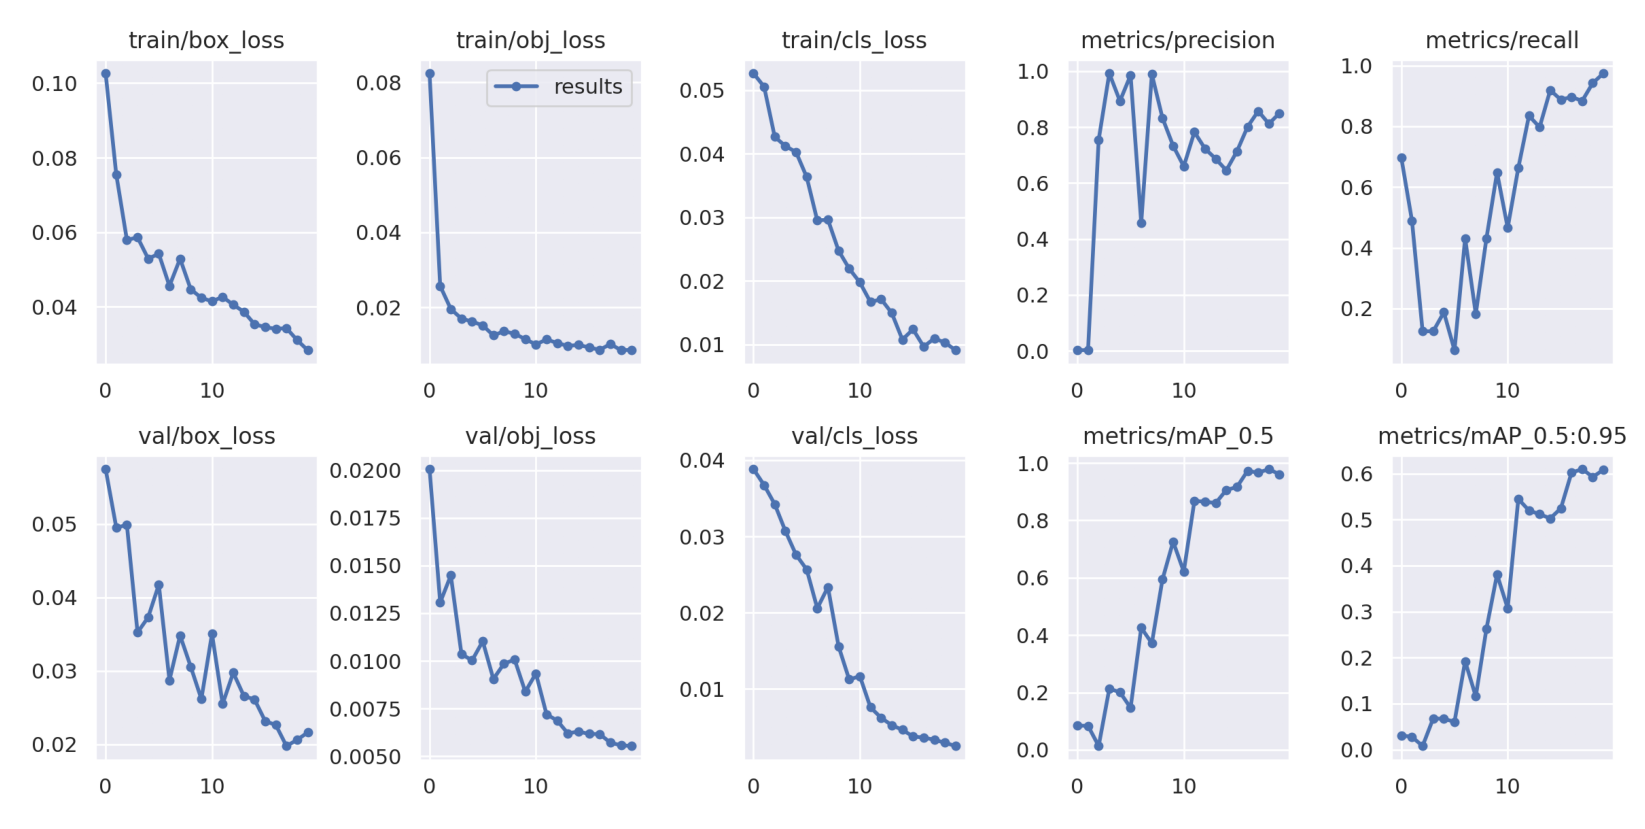

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/runs/train/exp/results.png'))


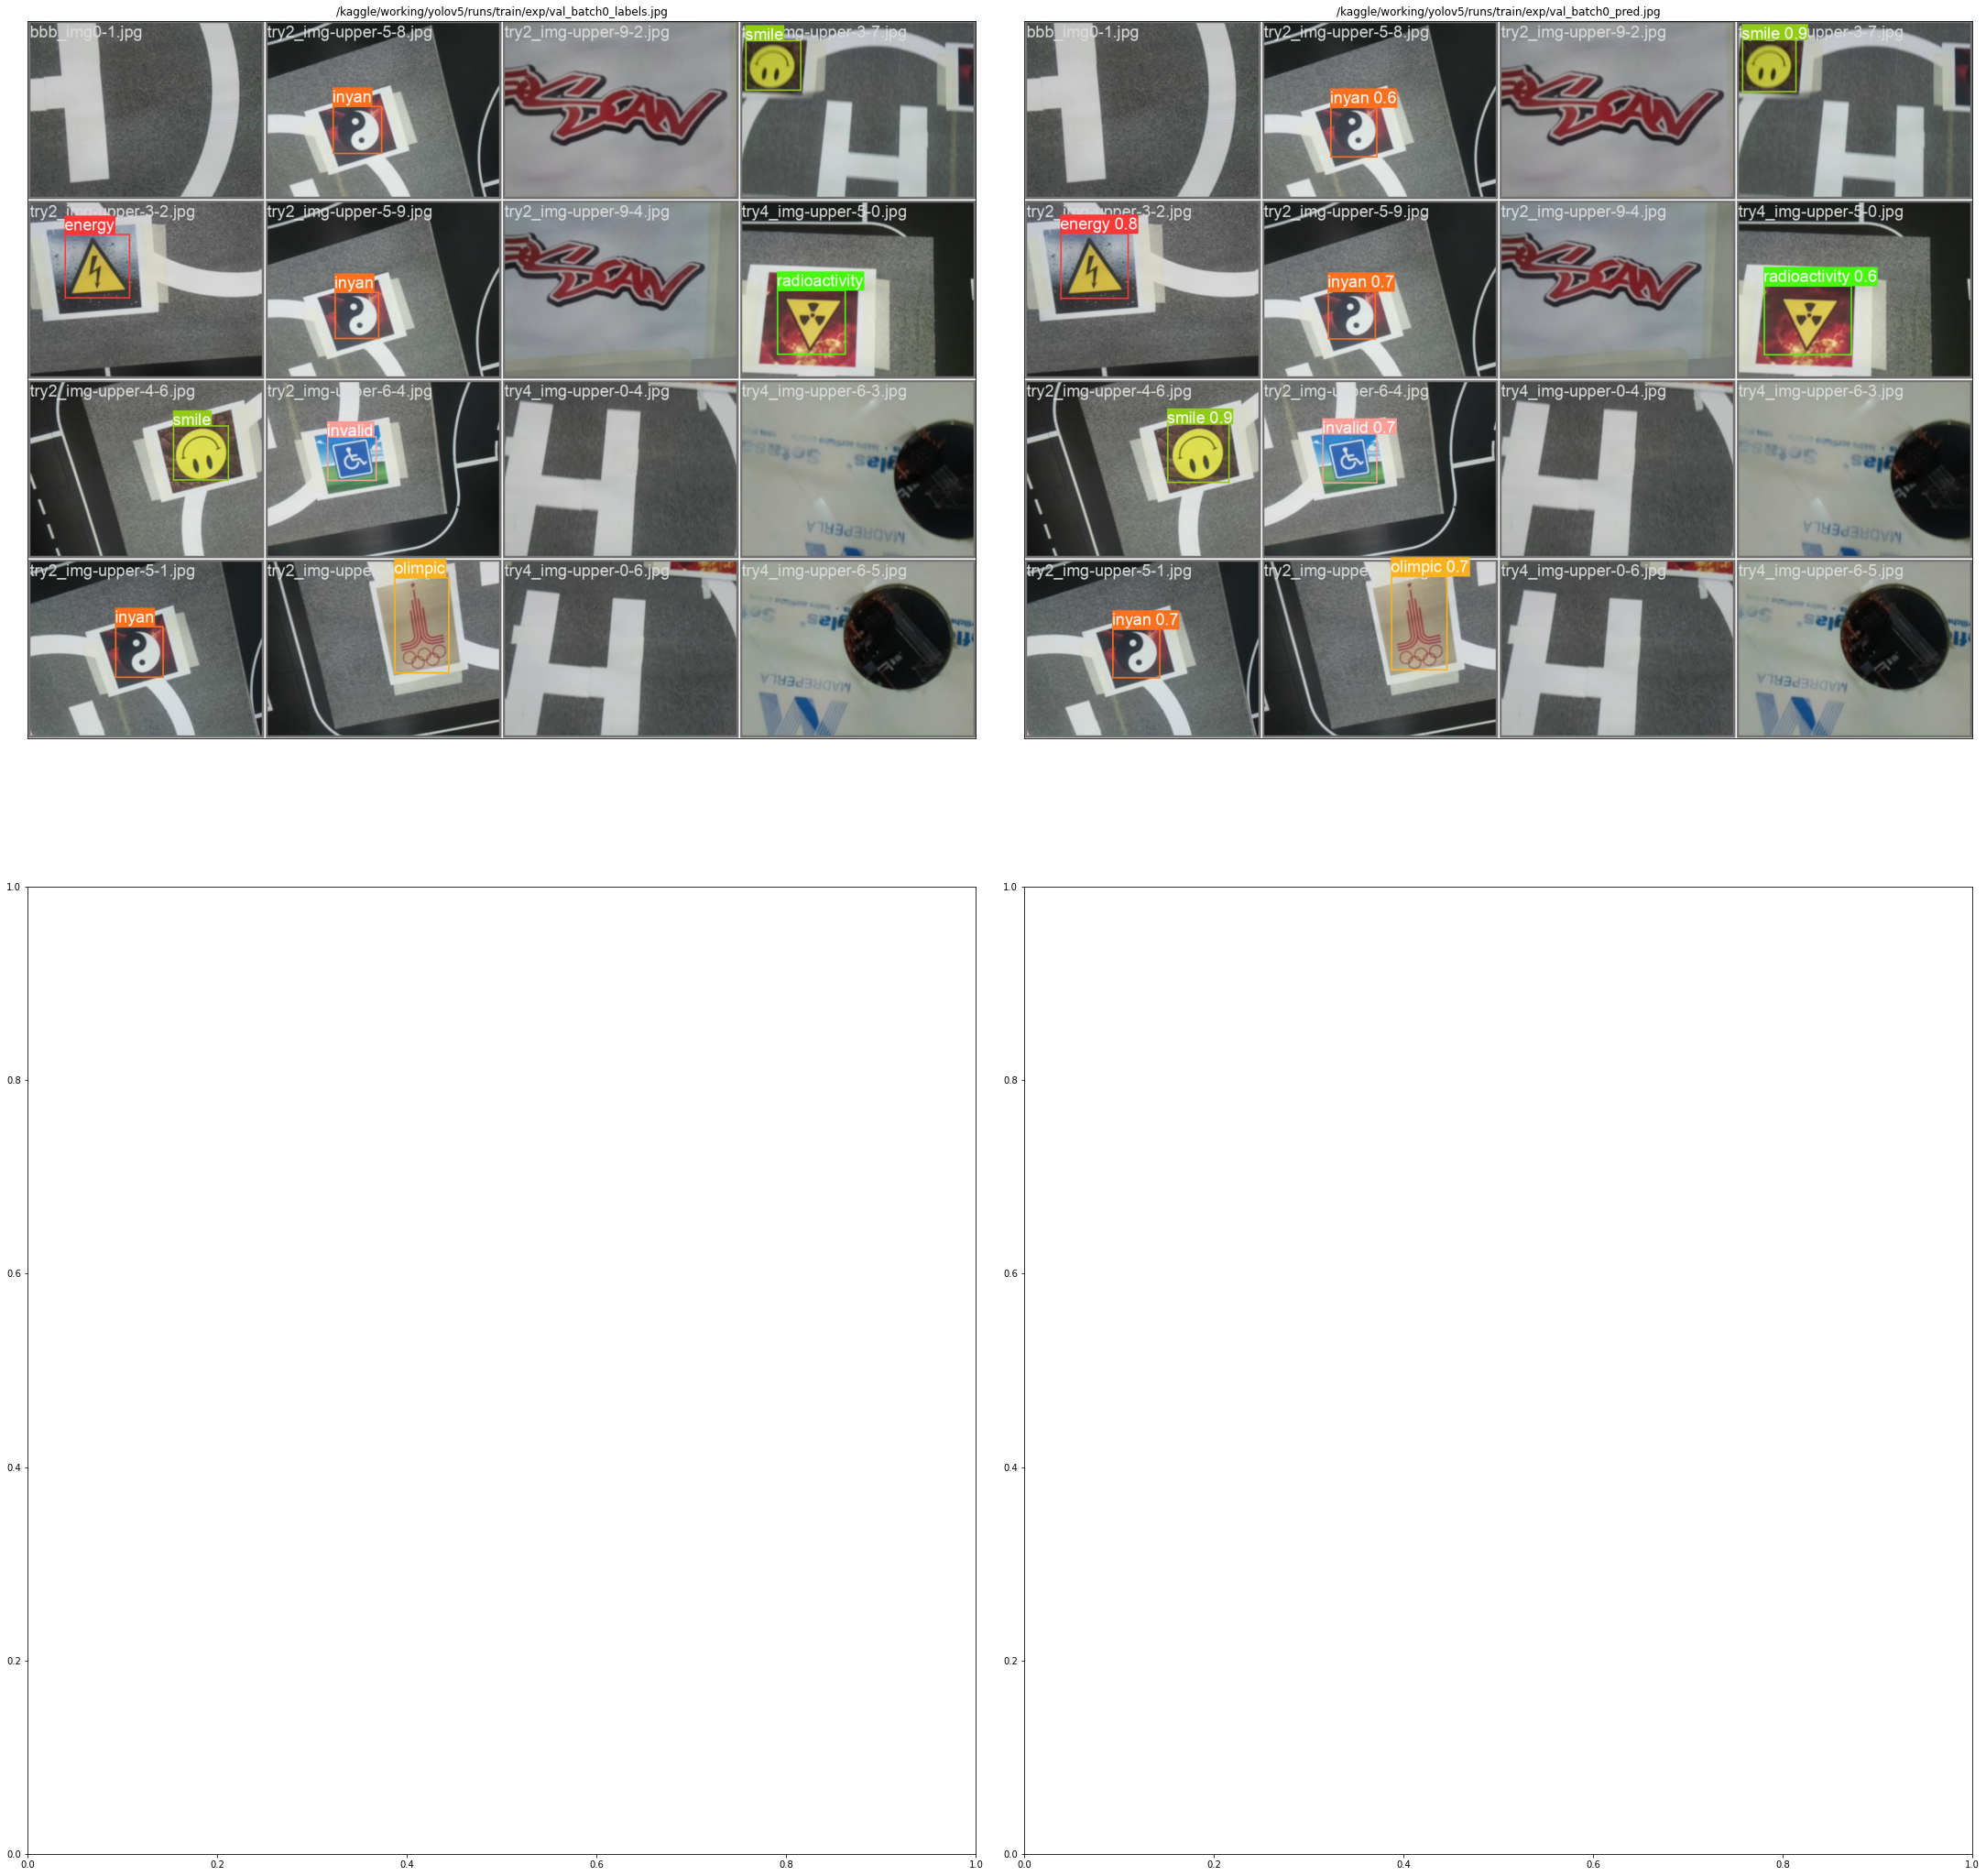

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (30,30), constrained_layout = True)
for row in range(1):
    ax[row][0].imshow(plt.imread(f'/kaggle/working/yolov5/runs/train/exp/val_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'/kaggle/working/yolov5/runs/train/exp/val_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(plt.imread(f'/kaggle/working/yolov5/runs/train/exp/val_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'/kaggle/working/yolov5/runs/train/exp/val_batch{row}_pred.jpg', fontsize = 12)
plt.show()

# YOLOv8

In [16]:
!pip install -q ultralytics

In [19]:
!python -m pip install setuptools==59.5.0

     |████████████████████████████████| 952 kB 30.3 MB/s            
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.5.1
    Uninstalling setuptools-67.5.1:
      Successfully uninstalled setuptools-67.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
cudf 21.10.1 requires cupy-cuda110, which is not installed.
beatrix-jupyterlab 3.1.4 requires google-cloud-bigquery-storage, which is not installed.
gcsfs 2021.11.0 requires fsspec==2021.11.0, but you have fsspec 2021.11.1 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2021.11.2 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2021.11.2 which is incompat

In [22]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.50 🚀 Python-3.7.12 torch-1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4437.1/8062.4 GB disk)


In [23]:
!git clone https://github.com/ultralytics/ultralytics
%pip install -qe ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 5597, done.
remote: Counting objects: 100% (516/516), done.
remote: Compressing objects: 100% (301/301), done.
remote: Total 5597 (delta 273), reused 373 (delta 206), pack-reused 5081
Receiving objects: 100% (5597/5597), 4.47 MiB | 10.05 MiB/s, done.
Resolving deltas: 100% (3645/3645), done.
Note: you may need to restart the kernel to use updated packages.


In [26]:
%%time
!yolo task=detect mode=train model=yolov8n.pt data=/kaggle/working/bgr.yaml epochs=20 imgsz=1280

Ultralytics YOLOv8.0.50 🚀 Python-3.7.12 torch-1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/bgr.yaml, epochs=20, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

In [33]:
# %ls ultralytics/

CITATION.cff     README.md        examples/         setup.py
CONTRIBUTING.md  README.zh-CN.md  mkdocs.yml        tests/
LICENSE          docker/          requirements.txt  ultralytics/
MANIFEST.in      docs/            setup.cfg         ultralytics.egg-info/


In [36]:
# %ls runs/detect/train5/

F1_curve.png                                        train_batch0.jpg
PR_curve.png                                        train_batch1.jpg
P_curve.png                                         train_batch2.jpg
R_curve.png                                         train_batch240.jpg
args.yaml                                           train_batch241.jpg
confusion_matrix.png                                train_batch242.jpg
events.out.tfevents.1678125903.ab0857e13b3c.1505.0  val_batch0_labels.jpg
labels.jpg                                          val_batch0_pred.jpg
labels_correlogram.jpg                              val_batch1_labels.jpg
results.csv                                         val_batch1_pred.jpg
results.png                                         weights/


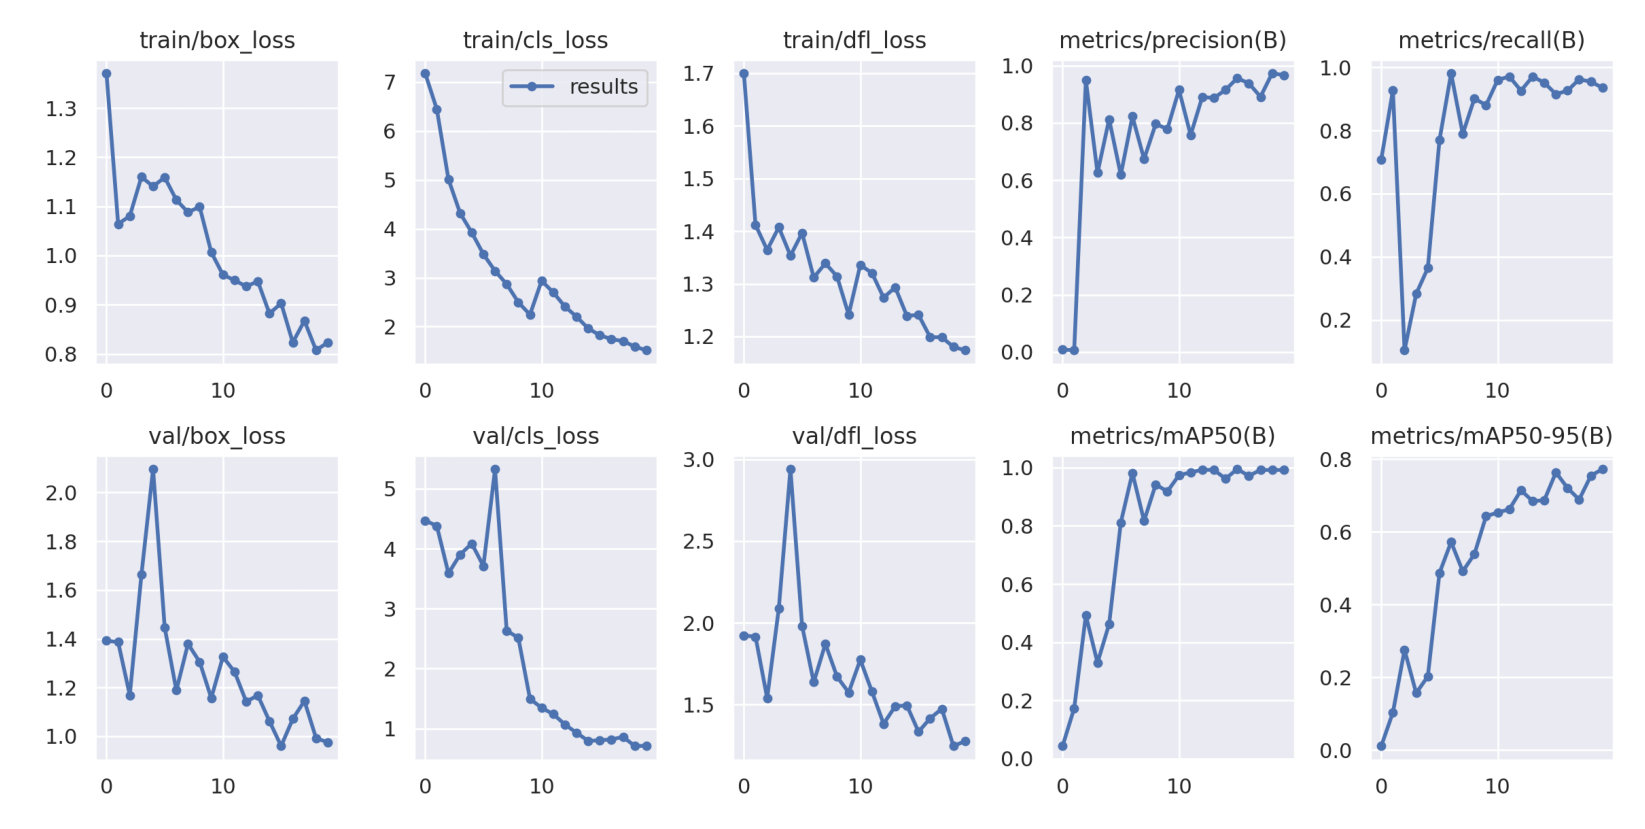

In [37]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('runs/detect/train5/results.png'))

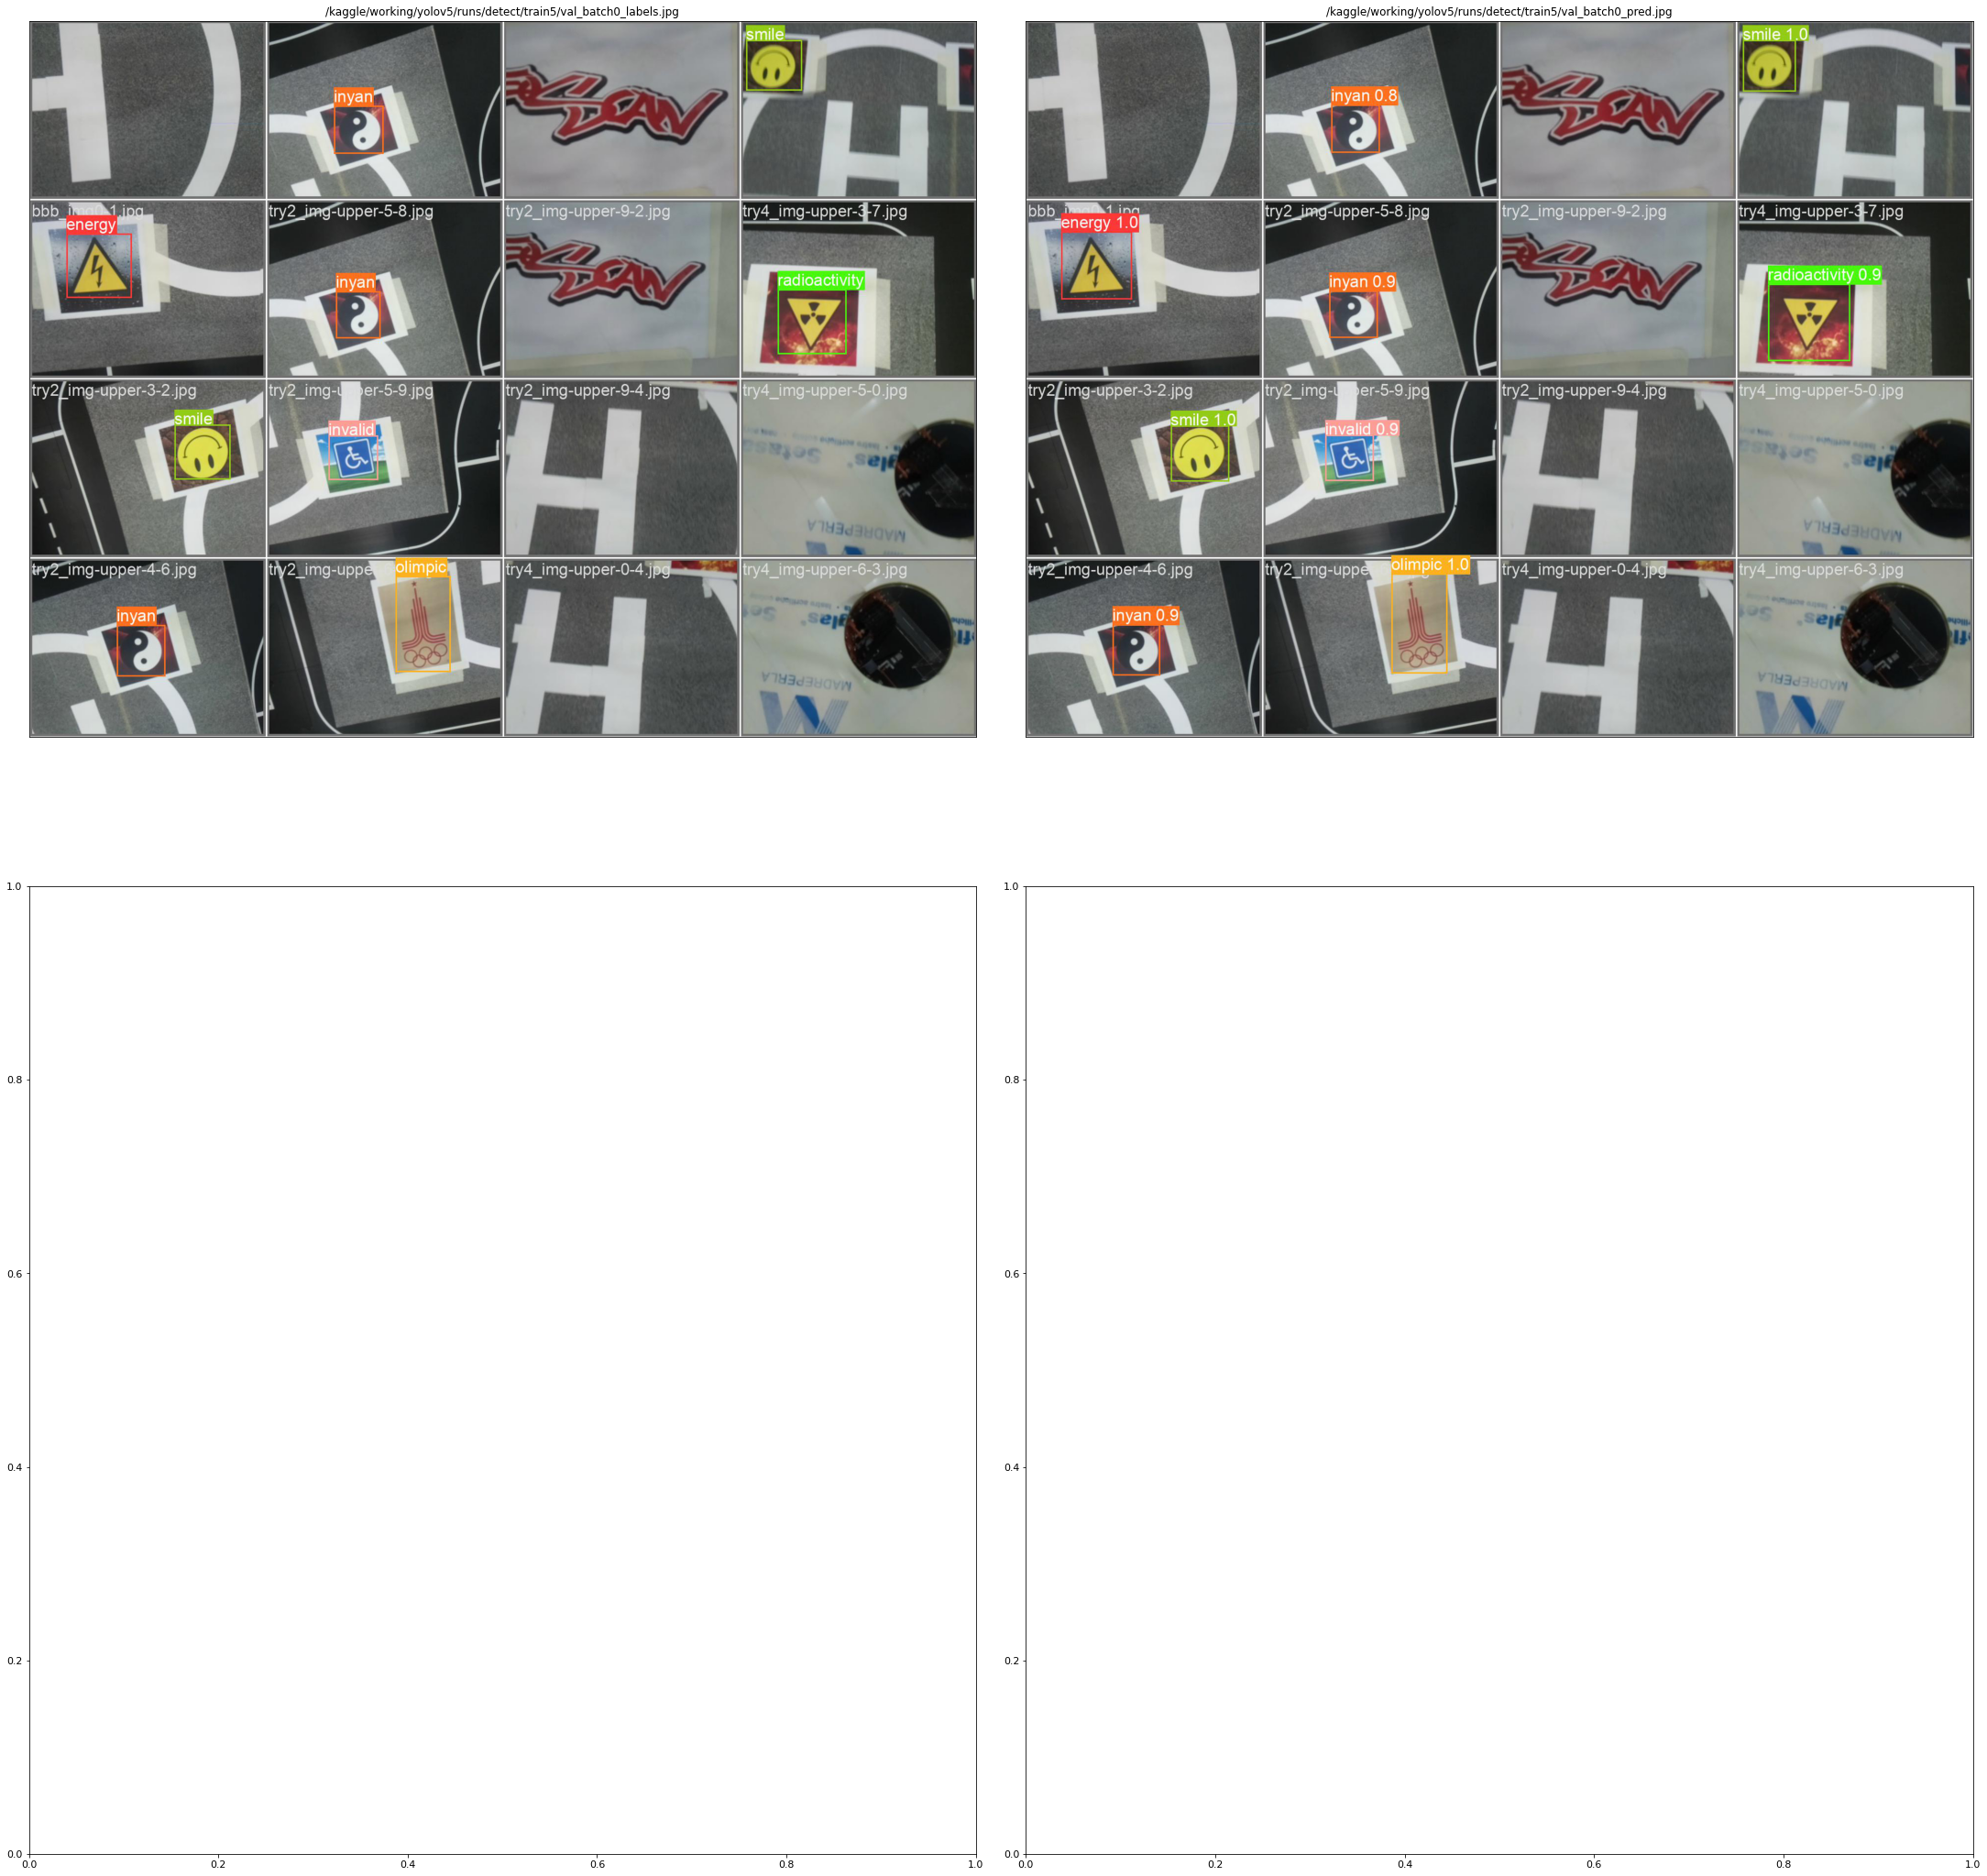

In [44]:
fig, ax = plt.subplots(2, 2, figsize = (30,30), constrained_layout = True)
for row in range(1):
    ax[row][0].imshow(plt.imread(f'/kaggle/working/yolov5/runs/detect/train5/val_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'/kaggle/working/yolov5/runs/detect/train5/val_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(plt.imread(f'/kaggle/working/yolov5/runs/detect/train5/val_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'/kaggle/working/yolov5/runs/detect/train5/val_batch{row}_pred.jpg', fontsize = 12)
plt.show()

# Predict

In [ ]:
# import torch
# from PIL import Image

# CKPT_PATH = '/kaggle/working/yolov5/runs/train/exp/weights/best.pt'
# yolov5 = torch.hub.load('/kaggle/working/yolov5','custom',path=CKPT_PATH,source='local',force_reload=True)

# 'confidence: ' + str(yolov5.conf)

In [ ]:
# %cd /kaggle/working

In [ ]:
# from PIL import Image
# img_test = Image.open("/kaggle/input/my-test-img/photo_2022-11-22_19-21-29.jpg")
# img_test

In [ ]:
# results = yolov5("/kaggle/input/my-test-img/photo_2022-11-22_19-21-29.jpg")
# fig, ax = plt.subplots(figsize=(30, 30))
# ax.imshow(results.render()[0])
# plt.show()

In [ ]:
# import cv2
# predict_image = yolov5(["/kaggle/input/my-test-img/photo_2022-11-22_19-21-29.jpg"])
# predict_image = predict_image.xyxy[0].data.cpu().numpy().tolist()
# predict_image